# Day 27

Today I want to see if close games tend to have a lot of field goals. Field goals can be indicative of a close game where offenses are stymied and forced to settle for field goals. Matches with higher amounts, say >5 could mean both teams' offenses had trouble moving the ball.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Create database connection
conn = sqlite3.connect('../../data/db/database.db')

Dataset is all games so far
Box plot of total number of field goals and win_margin
Use the box plot template from the practical exam

## Query Data

In [182]:
query = """
    SELECT *
    FROM pbp_score_summary
    WHERE pbp_score IS NOT NULL
"""

df_pbp = pd.read_sql(query, conn)
print(len(df_pbp))
df_pbp.tail()

12568


,game_id,team,sched_score,pbp_score,score_diff,tot_pass_tds,tot_rush_tds,tot_ret_tds,tot_extra_pts,tot_fgs,tot_2pt_conv,tot_def_tds,tot_safeties,tot_def_2pt,tot_off_fumble_recov_td
12563,2022_10_IND_LV,IND,25.0,25.0,0.0,1.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
12564,2022_10_DAL_GB,DAL,28.0,28.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
12565,2022_10_ARI_LA,ARI,27.0,27.0,0.0,1.0,2.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0
12566,2022_10_LAC_SF,LAC,16.0,16.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0
12567,2022_10_WAS_PHI,WAS,32.0,32.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,0.0


12,568 game-team records from 1999-2022 Week 10

In [183]:
query = """
WITH data AS (
    SELECT
        game_id,
        season,
        week,
        ABS(result) AS win_margin
    FROM schedules 
    WHERE game_type = 'REG' AND (
        season <= 2021 OR season = 2022 AND week <= 10
    )
)
SELECT *
FROM data
"""

df_win_margin = pd.read_sql(query, conn)
print(len(df_win_margin))
df_win_margin.tail()

6030


,game_id,season,week,win_margin
6025,2022_10_IND_LV,2022,10,5.0
6026,2022_10_DAL_GB,2022,10,3.0
6027,2022_10_ARI_LA,2022,10,10.0
6028,2022_10_LAC_SF,2022,10,6.0
6029,2022_10_WAS_PHI,2022,10,11.0


6,030 game records from 1999-2022 Week 10

In [184]:
# Aggregate and sum the columns (want to see totals)
df_pbp_by_game = df_pbp.groupby('game_id').sum().reset_index()

print(len(df_pbp_by_game))
df_pbp_by_game.head()

6284


/var/folders/pr/phs5jp1d143fx1t05hqzwt580000gn/T/ipykernel_75444/2021247481.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pbp_by_game = df_pbp.groupby('game_id').sum().reset_index()


,game_id,sched_score,pbp_score,score_diff,tot_pass_tds,tot_rush_tds,tot_ret_tds,tot_extra_pts,tot_fgs,tot_2pt_conv,tot_def_tds,tot_safeties,tot_def_2pt,tot_off_fumble_recov_td
0,1999_01_ARI_PHI,49.0,49.0,0.0,3.0,2.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0
1,1999_01_BUF_IND,45.0,45.0,0.0,3.0,1.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0
2,1999_01_CAR_NO,29.0,29.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0
3,1999_01_CIN_TEN,71.0,71.0,0.0,5.0,3.0,0.0,5.0,4.0,2.0,0.0,1.0,0.0,0.0
4,1999_01_DAL_WAS,76.0,76.0,0.0,7.0,3.0,0.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0


In [185]:
merged = pd.merge(df_pbp_by_game,
                  df_win_margin,
                  how='inner',
                  on='game_id')

print(len(merged))
merged.head()

6027


,game_id,sched_score,pbp_score,score_diff,tot_pass_tds,tot_rush_tds,tot_ret_tds,tot_extra_pts,tot_fgs,tot_2pt_conv,tot_def_tds,tot_safeties,tot_def_2pt,tot_off_fumble_recov_td,season,week,win_margin
0,1999_01_ARI_PHI,49.0,49.0,0.0,3.0,2.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,1999,1,1.0
1,1999_01_BUF_IND,45.0,45.0,0.0,3.0,1.0,0.0,4.0,3.0,1.0,1.0,0.0,0.0,0.0,1999,1,17.0
2,1999_01_CAR_NO,29.0,29.0,0.0,2.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,1999,1,9.0
3,1999_01_CIN_TEN,71.0,71.0,0.0,5.0,3.0,0.0,5.0,4.0,2.0,0.0,1.0,0.0,0.0,1999,1,1.0
4,1999_01_DAL_WAS,76.0,76.0,0.0,7.0,3.0,0.0,8.0,2.0,1.0,0.0,0.0,0.0,0.0,1999,1,6.0


## Exploration

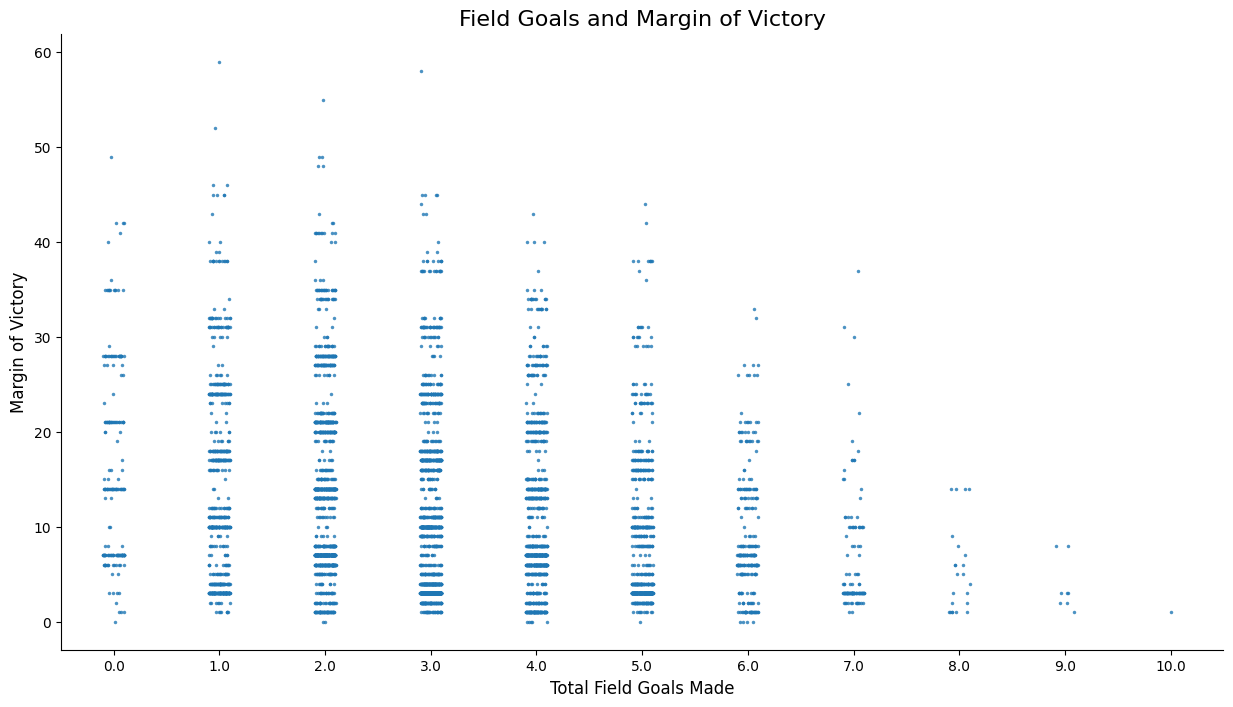

In [186]:
# Change plot size
plt.figure(figsize = (15,8))

g = sns.stripplot(
    x='tot_fgs',
    y='win_margin',
    data=merged,
    jitter=True,
    size=2.5,
    alpha=0.8,
)

# Add labels and title
g.set_xlabel("Total Field Goals Made", size=12)
g.set_ylabel("Margin of Victory", size=12)
g.set_title("Field Goals and Margin of Victory", size=16)

sns.despine()
plt.show()

In [187]:
merged['tot_fgs'].corr(merged['win_margin'])

-0.23976887733546584

There is a weak negative linear relationship between total field goals in a game and the game's margin of victory. This makes sense. Games with a high number of fields goals made are by definition games where at least one team's offense isn't clicking well – likely getting stopped and needed to settle for FGs.